<div class="alert alert-block alert-success">
    <h1 align="center">Information Retrival Systems</h1>
    <h2 align="center">Simple search engine project</h2>
    <h3 align="center">Phase 1</h3>
</div>

<div>
<img src="./images/search2.jpg" width="1000" height="100"/>
</div>

## Loading Libraries

- We need Two important libraries for this project:
- [ ] hazm
- [ ] parsivar
- I use parsivar for Normalization, Tokenization and Stemming and use hazm for find stopwords and remove them
- Also we use pandas for working with dataframe and also numpy for working with arrays

In [1]:
from parsivar import Normalizer, Tokenizer, FindStems
from hazm import stopwords_list
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import pickle
import re
import math
import numpy as np
import matplotlib.pyplot as plt
from string import punctuation
from sklearn.linear_model import LinearRegression
import string
import pandas as pd

## Loading Dataset

In [2]:
# If we work with google colab
"""
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/IR_data_news_12k.json'
df = pd.read_json(data_path)
"""
# If we work on local system
df = pd.read_json('./Data/IR_data_news_12k.json')

## EDA

- First We should get some information about our dataset. If we konw it well we can do better

In [3]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,12192,12193,12194,12195,12196,12197,12198,12199,12200,12201
title,اعلام زمان قرعه کشی جام باشگاه های فوتسال آسیا,سجادی :حضور تماشاگران در لیگ برتر فوتبال تابع...,محل برگزاری نشست‌های خبری سرخابی‌ها؛ مجیدی در ...,ماجدی در نشست با صالحی امیری: امیدوارم در این ...,لیگ‌برتر بسکتبال|‌ نخستین پیروزی شهرداری گرگان...,مسابقات تنیس روی میز فیدر قطر| هر4 بانوی ملی پ...,اعلام برنامه نشست خبری گل محمدی/ مجیدی هم باید...,احضار مدیران پرسپولیس به کمیته انضباطی پیش از...,مدیر بی‌دستاورد، رئیس شد/ روزگار تلخ‌تر از تلخ...,خبر خوب برای استقلال؛ دانشگر با تیم تمرین کرد,...,کمیته ویژه‌ای از سوی رئیس جمهور مسئول پیگیری م...,مصری: با سفرهای استانی، کُلاه سر رئیس‌جمهور نم...,رئیسی به اردبیل سفر می‌کند/ توضیحاتی درباره مق...,رئیس دفتر رئیس جمهور وضعیت زلزله زرند را بررسی...,جزئیات گزارش سفر نظارتی اعضای کمیسیون فرهنگی م...,دفع حمله دزدان دریایی به دو نفتکش ایرانی توسط ...,نقدی بر یادداشت «مرزبندی گفتمانی با طالبان»/ و...,روند تحقیق و تفحص از سازمان سنجش با جدیت ادامه...,محسن اسلامی مدیرکل دفتر امور سیاسی وزارت کشور شد,جلسه سران قوا به‌ میزبانی رئیس مجلس برگزار شد
content,\nبه گزارش خبرگزاری فارس، کنفدراسیون فوتبال آس...,\nبه گزارش خبرگزاری فارس، سید حمید سجادی در حا...,\nبه گزارش خبرگزاری فارس، نشست خبری پیش از مسا...,\nبه گزارش خبرگزاری فارس، سید رضا صالحی امیری...,\nبه گزارش خبرنگار ورزشی خبرگزاری فارس، در نخس...,\nبه گزارش خبرگزاری فارس، چهار بانوی تنیس روی ...,\nبه گزارش خبرگزاری فارس و به نقل از سایت باش...,\nبه گزارش خبرنگار ورزشی خبرگزاری فارس، کمیته ...,\nبه گزارش خبرنگار ورزشی خبرگزاری فارس، مجمع ا...,\nبه گزارش خبرنگار ورزشی خبرگزاری فارس، تمرین ...,...,\nاسماعیلی حسین زهی نماینده مردم خاش در مجلس ش...,\nعبدالرضا مصری نایب رئیس مجلس شورای اسلامی در...,\nبه گزارش گروه سیاسی خبرگزاری فارس، سیّد صولت...,\nبه گزارش گروه سیاسی خبرگزاری فارس غلامحسین ا...,\nغلامرضا منتظری نماینده مردم گرگان در مجلس شو...,\nبه گزارش گروه دفاعی خبرگزاری فارس، دریادار ش...,\nخبرگزاری فارس ـ یادداشت میهمان ـ مسعود مرادی...,\nبه گزارش خبرنگار پارلمانی خبرگزاری فارس، هیا...,\nبه گزارش خبرگزاری فارس به نقل از پایگاه اطلا...,\nبه گزارش خبرنگار پارلمانی خبرگزاری فارس، جلس...
tags,"[اعلام زمان, قرعه‌کشی, قرعه‌کشی جام, قرعه‌کشی ...","[سجادی, لیگ, فدراسیون, وزیر ورزش]","[دربی 94, محل برگزاری, خبری سرخابی‌ها, مجیدی, ...","[کمیته امداد امام خمینی (ره), کمیته ملی المپیک...","[بسکتبال, لیگ برتر بسکتبال, شهرداری گرگان, تیم...","[مهشید اشتری, تنیس روی میز, ملی پوشان تنیس روی...","[باشگاه استقلال, یحیی گل محمدی, فرهاد مجیدی, ن...","[باشگاه پرسپولیس, احضار مدیران پرسپولیس به کمی...","[والیبال, پیمان رضایی, تیم والیبال شهرداری ارو...","[دانشگر با تیم تمرین کرد, محمد دانشگر, استقلال]",...,"[مجلس شورای اسلامی, کمیسیون عمران, اسماعیل حسی...","[سید ابراهیم رئیسی, مجلس شورای اسلامی, رئیس‌جم...","[سید ابراهیم رئیسی, صولت مرتضوی, سفر رئیسی به ...","[غلامحسین اسماعیلی, رئیس دفتر رئیس جمهور, زلزل...","[مجلس شورای اسلامی, غلامرضا منتظری, نایب رئیس ...","[ارتش جمهوری اسلامی ایران, شهرام ایرانی, نیروی...","[طالبان, یادداشت, گفتمان, جمهوری اسلامی ایران,...","[مجلس شورای اسلامی, سازمان سنجش و آموزش کشور, ...","[وزارت کشور, احمد وحیدی, وزیر کشور, وزارت علوم...","[سران قوا, رئیس مجلس, رئیس جمهور, رئیس قوه قضا..."
date,3/15/2022 5:59:27 PM,3/15/2022 5:30:07 PM,3/15/2022 5:20:01 PM,3/15/2022 5:18:00 PM,3/15/2022 5:16:41 PM,3/15/2022 5:15:34 PM,3/15/2022 3:57:47 PM,3/15/2022 3:43:18 PM,3/15/2022 3:35:21 PM,3/15/2022 3:21:04 PM,...,10/17/2021 7:17:00 AM,10/17/2021 6:05:00 AM,10/16/2021 8:58:18 PM,10/16/2021 8:47:20 PM,10/16/2021 7:38:13 PM,10/16/2021 6:25:36 PM,10/16/2021 5:03:39 PM,10/16/2021 4:54:47 PM,10/16/2021 4:14:30 PM,10/16/2021 4:05:31 PM
url,https://www.farsnews.ir/news/14001224001005/اع...,https://www.farsnews.ir/news/14001224000982/سج...,https://www.farsnews.ir/news/14001224000971/مح...,https://www.farsnews.ir/news/14001224000964/ما...,https://www.farsnews.ir/news/14001224000947/لی...,https://www.farsnews.ir/news/14001224000916/مس...,https://www.farsnews.ir/news/14001224000865/اع...,https://www.farsnews.ir/news/14001224000842/اح...,https://www.farsnews.ir/news/140012

So it has 6 rows and 12202 columns. but this is unusual and we should transpose it.

In [4]:
df = df.transpose()
df.head(5)

,title,content,tags,date,url,category
0,اعلام زمان قرعه کشی جام باشگاه های فوتسال آسیا,\nبه گزارش خبرگزاری فارس، کنفدراسیون فوتبال آس...,"[اعلام زمان, قرعه‌کشی, قرعه‌کشی جام, قرعه‌کشی ...",3/15/2022 5:59:27 PM,https://www.farsnews.ir/news/14001224001005/اع...,sports
1,سجادی :حضور تماشاگران در لیگ برتر فوتبال تابع...,\nبه گزارش خبرگزاری فارس، سید حمید سجادی در حا...,"[سجادی, لیگ, فدراسیون, وزیر ورزش]",3/15/2022 5:30:07 PM,https://www.farsnews.ir/news/14001224000982/سج...,sports
2,محل برگزاری نشست‌های خبری سرخابی‌ها؛ مجیدی در ...,\nبه گزارش خبرگزاری فارس، نشست خبری پیش از مسا...,"[دربی 94, محل برگزاری, خبری سرخابی‌ها, مجیدی, ...",3/15/2022 5:20:01 PM,https://www.farsnews.ir/news/14001224000971/مح...,sports
3,ماجدی در نشست با صالحی امیری: امیدوارم در این ...,\nبه گزارش خبرگزاری فارس، سید رضا صالحی امیری...,"[کمیته امداد امام خمینی (ره), کمیته ملی المپیک...",3/15/2022 5:18:00 PM,https://www.farsnews.ir/news/14001224000964/ما...,sports
4,لیگ‌برتر بسکتبال|‌ نخستین پیروزی شهرداری گرگان...,\nبه گزارش خبرنگار ورزشی خبرگزاری فارس، در نخس...,"[بسکتبال, لیگ برتر بسکتبال, شهرداری گرگان, تیم...",3/15/2022 5:16:41 PM,https://www.farsnews.ir/news/14001224000947/لی...,sports


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12202 entries, 0 to 12201
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     12202 non-null  object
 1   content   12202 non-null  object
 2   tags      12202 non-null  object
 3   date      12202 non-null  object
 4   url       12202 non-null  object
 5   category  12202 non-null  object
dtypes: object(6)
memory usage: 925.3+ KB


Thats very good. we dont have any null object. 

In [6]:
df['category'].unique()

array(['sports', 'politics'], dtype=object)

According to category column we only have two class of news : Sports and politics

In [7]:
len(df['date'].unique())

12183

## Utils
- Some functions that we use in next steps. we define them here.

In [8]:
def save_in_file(myinput, filename):
    with open(filename, 'wb') as outp: 
        pickle.dump(myinput, outp, pickle.HIGHEST_PROTOCOL)
        print(f'your input saved in {filename}')
    
def load_file(filename):
    my_file = None
    with open(filename, 'rb') as inp:
        my_file = pickle.load(inp)
    return my_file

# Step1)
## Data Preprocessing

- First we should define some functions for removing punctuations and stemming and removing stopwords. because for doing these preprocessing jobs we dont have a straightforward function in library.

In [9]:
def remove_punc (input_content):
    return re.sub(r'[^\w\s]','',input_content)

def stemmer (tokens):
    stemmed = []
    st = FindStems()
    for i in tokens:
        stemmed_token = st.convert_to_stem(i)
        stemmed.append(stemmed_token)
    return stemmed

def stopwords_remover(stemmed):
    stop_words = stopwords_list()
    
    for i in stemmed:
        if i in stop_words:
            stemmed.remove(i)
    return stemmed

- Now we define a function for single news preprocessing and showing each steps

In [10]:
def single_preprocess (input_content):
    print("Original content:")
    print(input_content+"\n")
    # 1) first we remove punctuations
    punc_removed = remove_punc(input_content)
    print("After removing puncs:")
    print(punc_removed+"\n")
    # 2) second we Normalize it
    normal_content = Normalizer().normalize(punc_removed)
    print("After normalizing:")
    print(normal_content+"\n")
    # 3) then we can tokenize content
    tokened_content = Tokenizer().tokenize_words(normal_content)
    print("After tokenizing:")
    print(tokened_content,'\n')
    # 4) then we remove stopwords
    # (Attention: in the parsivar library there isn't any functions to remove stopwords. so we use hazm for this part)
    removed_content = stopwords_remover(tokened_content)
    print("After removing stopwords:")
    print(removed_content,"\n")
    # 5) then we stemming
    stemmed_content = stemmer(removed_content)
    print("After stemming:")
    print(stemmed_content,"\n")

In [11]:
content_temp = df.iloc[27]['content']
single_preprocess(content_temp)

Original content:

سعید احمدوند در گفت‌وکو با خبرنگار ورزشی خبرگزاری فارس، در مورد تغییر و تحولات در فدراسیون تنیس و برخی استعفاها در این فدراسیون اظهار داشت: این حق هر رئیس فدراسیون است که در مجموعه کاری خود تغییر و تحول بدهد و با هر کس که دوست دارد کار کند. در همه فدراسیون‌ها به این شکل است و در گذشته هم از این دست اتفاقات افتاده است. بارها دبیران فدراسیون تغییر کرده‌اند، اما به نظرم شکل اعتراضی که از سوی برخی صورت گرفت، می‌توانست منطقی‌تر باشد. از آن مهم‌تر اینکه وقتی اعتراض گروهی است،‌‌ بهتر است تا آخر همه پای آن بایستند نه اینکه وسط کار نظر خود را تغییر دهند. به هر حال رفتارهای انسانها با یکدیگر متفاوت است. در مجموع من با این شکل اعتراض موافق نبودم و بهتر بود تصمیم دیگری گرفته می‌شد. سرمربی سابق تیم ملی تنیس عنوان کرد: عزیزی رئیس فدراسیون بهتر است تغییر را در جاهایی که الزامی‌تر است صورت دهد، مثلاً ما در بخش آموزش واقعا ضعیف هستیم و هر چه سریع‌تر باید در مورد آن اقدام جدی صورت بگیرد. ما در سطح بسیار پائینی هستیم و اگر فکر می‌کنند صمت‌های آسیایی مسئول آموزش فدراسیون می‌تواند به این

- I define a function for do preprocessing step on all of data. It has three input arguments:  
1- **input_content**: The input text like content column in dataset or query text  
2- **is_stopwords_remove**: Its specify we can removing stop words or not ( we use in zipf law section)  
3- **is_stemming**: Its specify we can do stemming words or not ( we use in heaps law section)  

In [12]:
def total_preprocess (input_content, is_stopwords_remove=True, is_stemming=True):
  
    # 1) first we remove punctuations
    punc_removed = remove_punc(input_content)

    # 2) second we Normalize it
    normal_content = Normalizer().normalize(punc_removed)
      
    # 3) then we can tokenize content
    updated_content = Tokenizer().tokenize_words(normal_content)
      
    # 4) then we remove stopwords
    # (Attention: in the parsivar library there isn't any functions to remove stopwords. so we use hazm for this part)
    if is_stopwords_remove:
        updated_content = stopwords_remover(updated_content)
      
    # 5) then we stemming
    if is_stemming:
        updated_content = stemmer(updated_content)
      
    return updated_content

In [13]:
preprocessed_content = []
for i in range(len(df)):
    if ( i % 2000 ==0):
        print(i)
    input_content = df.iloc[i]['content']
    preprocessed_content.append(total_preprocess(input_content))

0
2000
4000
6000
8000
10000
12000


- Because the last process is time consuming so we can save the preprocessed content in a file and when we restart the kernel of jupyter then we can load it from that file. for do it we can use the functions defined in Utils section.

In [14]:
save_in_file(preprocessed_content, './Processed data/preprocessed_content.pkl')

your input saved in ./Processed data/preprocessed_content.pkl


In [15]:
# preprocessed_content = load_file('./Processed data/preprocessed_content.pkl')

# Step2)
## Creating Positional Inverted Index

- According to slides we need implementing dictionary and postings list for our inverted index. In python we can use dict datastructure for do this job. with using this accessing to each token and its postings list will become much easier.

In [16]:
def inverted_index_creator(preprocessed_content):
    
    inverted_index = {}
    
    for doc_id in range(len(preprocessed_content)):
        
        # for checking progress
        if doc_id%2000 == 0: print(doc_id)
            
        for token_pos in range(len(preprocessed_content[doc_id])):
            
            token = preprocessed_content[doc_id][token_pos]
            
            if token not in inverted_index:
                inverted_index[token]={
                    'doc_frequency': 1,
                    'posting_list': [
                        {
                            doc_id:{
                                'term_frequency': 1,
                                'positions': [token_pos,]
                            }
                        }
                    ]
                }
                
            else:
                doc_id_list = []
                for doc in inverted_index[token]['posting_list']:
                    doc_id_list.append(list(doc.keys())[0])
    
                if doc_id in doc_id_list:
            
                    doc_index = doc_id_list.index(doc_id)
                    inverted_index[token]['posting_list'][doc_index][doc_id]['term_frequency'] += 1
                    inverted_index[token]['posting_list'][doc_index][doc_id]['positions'].append(token_pos)
                    
                else:
                    
                    inverted_index[token]['doc_frequency'] += 1
                    inverted_index[token]['posting_list'].append({
                        doc_id:{
                            'term_frequency': 1,
                            'positions': [token_pos,]
                        }
                    })
    return inverted_index

- Now we can give preprocessed data from step1 to above function for creating the inverted index.

In [17]:
inverted_index = inverted_index_creator(preprocessed_content)

0
2000
4000
6000
8000
10000
12000


- Because the last process is time consuming (like step1) so we can save the inverted index in a file and when we restart the kernel of jupyter then we can load it from that file. for do it we can use the functions defined in Utils section.

In [18]:
save_in_file(inverted_index, './Processed data/inverted_index.pkl')

your input saved in ./Processed data/inverted_index.pkl


In [19]:
# inverted_index = load_file('./Processed data/inverted_index.pkl')

- Also we can save dictionary part of our inverted index seperately in a variable to access it easier.

In [20]:
dictionary = list(inverted_index.keys())

# Step3&4)
## Query Processing & Showing results

- For doing this section I create a Query class. When we create a query object it should automatically find relevant contetns and return it. We can say this is a boolean query processing but we compute a rank for each doc and implementing ranked retrival. 

In [21]:
class Query():
    def __init__(self, query_text):
        self.query_text = query_text
        # define some variables for seperating different part of query
        self.not_tokens = self.get_not_token()
        self.phrasal_tokens = self.get_phrasal_tokens()
        self.normal = self.get_normals()
        # then we should preprocess query like docs
        if len(self.not_tokens)>0 : preprocessed_not_tokens = self.total_preprocess(" ".join(self.not_tokens))
        if len(self.normal)>0 : preprocessed_normals = self.total_preprocess(" ".join(self.normal))
        if len(self.phrasal_tokens)>0 : preprocessed_phrasal = [self.total_preprocess(phrase) for phrase in self.phrasal_tokens]
        # we want to search among our dictionary words. so we should do this below job:
        # (if we dont do this job its possible to ask from inverted index to return the postings
        # of a word that not exists in our dictionary and so we get "Key Error")
        self.final_not_tokens = None
        self.final_normals = None
        self.final_phrasal = None
        if len(self.not_tokens)>0 : self.final_not_tokens = self.in_dictionary_checker(preprocessed_not_tokens)
        if len(self.normal)>0 : self.final_normals = self.in_dictionary_checker(preprocessed_normals)
        if len(self.phrasal_tokens)>0 : self.final_phrasal = self.in_dictionary_checker(preprocessed_phrasal, phrasal_mode=True)
        
        # We use below parameters in get_related_postings function for avoiding to get error
        self.has_notToken = True
        self.has_normal = True
        self.has_phrasal = True
        if self.final_not_tokens == None:
            self.has_notToken = False
        if self.final_normals == None:
            self.has_normal = False
        if self.final_phrasal == None:
            self.has_phrasal = False

        self.show_result()
        
    def get_not_token(self):
        return re.findall(r'\!\s(\w+)', self.query_text)
    
    def get_phrasal_tokens(self):
        return re.findall(r'"([^"]*)"', self.query_text)
    
    def get_normals(self):
        normal_string = re.sub(r'\!\s\w+', '', self.query_text)
        normal_string = re.sub(r'"[^"]*"', '', normal_string)
        initial_normal = normal_string.split(' ')
        normal = []
        for token in initial_normal:
            if len(token)>0:
                normal.append(token)
       
        return normal
    
    def total_preprocess (self, input_content):
        
        # 1) first we remove punctuations
        punc_removed = remove_punc(input_content)
        
        # 2) second we Normalize it
        normal_content = Normalizer().normalize(punc_removed)

        # 3) then we can tokenize content
        tokened_content = Tokenizer().tokenize_words(normal_content)

        # 4) then we remove stopwords
        # (Attention: in the parsivar library there isn't any functions to remove stopwords. so we use hazm for this part)
        deleted_stop_words = stopwords_remover(tokened_content)
        
        # 5) then we stemming
        final_content = stemmer(deleted_stop_words)

        return final_content 
    
    def in_dictionary_checker(self,preprocessed_form, phrasal_mode=False):
        final_tokens = []
        # in phrasal mode if only we dont have one word of that phrase
        # then we should remove it from our final phrases
        if phrasal_mode:
            for phrase in preprocessed_form:
                flag = True
                for token in phrase:
                    if token not in dictionary:
                        print(token)
                        flag = False
                if flag:
                    final_tokens.append(phrase)
        else:
            for token in preprocessed_form:
                if token in dictionary:
                    final_tokens.append(token)
        if len(final_tokens) == 0:
            return None
        return final_tokens
    
    # Step 4)
    # Data set (in this step we should show the information that asked in project explanation)
    def show_result(self):
        final_postings = self.get_related_postings()
        sorted_result = self.sorting(final_postings)
        if len(sorted_result)==0:
            print("There isn't any doc related to this query")
        else:
            counter = 0
            for result in sorted_result:
                print(50*'/\\')
                print(f'Rank: {result[1]}')
                print(f'docID: {result[0]}')
                print(f'Title: {df.loc[result[0]]["title"]}')
                print(f'URL: {df.loc[result[0]]["url"]}')
                print(f'{df.loc[result[0]]["content"]}')
                print(50*'/\\')
                counter += 1
                if counter == 5:
                    break

    def sorting(self, final_postings):
        result = {}
        for posting in final_postings:
            result[list(posting.keys())[0]] = posting[list(posting.keys())[0]]['term_frequency']
        return sorted(result.items(), key=lambda x:x[1], reverse=True)
        
    def get_related_postings(self):
        if self.has_normal:
            #1) first we should calculate intersection between normal tokens' postings
            postings1 = None
            postings2 = None
            for i in range(len(self.final_normals)):
                if i==0:
                    postings1= inverted_index[self.final_normals[i]]['posting_list']
                    continue
                postings2 = inverted_index[self.final_normals[i]]['posting_list']
                postings1 = self.and_merge(postings1, postings2)
            normals_intersect = postings1
        #############################################################################
        if self.has_phrasal:
            #2)  also we should use positional merge between tokens in each phrase
            phrase_intersect = []
            for phrase in self.final_phrasal:
                postings1 = None
                postings2 = None
                for i in range(len(phrase)):
                    if i==0:
                        postings1= inverted_index[phrase[i]]['posting_list']
                        continue
                    postings2 = inverted_index[phrase[i]]['posting_list']
                    postings1 = self.positional_merge(postings1, postings2)
                phrase_intersect.append(postings1)
            
            #3) Now we use the results of step2. now we can intersect between different phrases
            # if(len(phrase_intersect)>1):
            postings1 = None
            postings2 = None
            i = 0
            for phrase_postings in phrase_intersect:
                if i==0:
                    postings1= phrase_postings
                    continue
                postings2 = phrase_postings
                postings1 = self.and_merge(postings1, postings2)
                i += 1
            final_phrases_intersect = postings1
            
            if self.has_normal:
                #4) the result of step1 and step3 are merged
                final_and = self.and_merge(normals_intersect, final_phrases_intersect)
            else:
                final_and = final_phrases_intersect
        elif self.has_normal:
            final_and = normals_intersect
        else:
            final_and = []
            return final_and
        #############################################################################    
        if self.has_notToken:
            #5) union between the doc_id of postings list of tokens in not_tokens list
            # according to and_not_merge algorithm we just need the doc_id of postings list and not tf or pose.
            not_tokens_doc_ids = set()
            for token in self.final_not_tokens:
                for i in range(len(inverted_index[token]['posting_list'])):
                    not_tokens_doc_ids.add(list(inverted_index[token]['posting_list'][i].keys())[0])
            not_tokens_postings = sorted(list(not_tokens_doc_ids))
            
            #6) now we can use and_not_mege algorithm to arrive to final postings
            return self.and_not_merge(final_and,not_tokens_postings)
        else:
            return final_and
    
    # We write this method and two others from psudo code in slides
    def and_merge(self,postings1, postings2):
        result = []
        p1 = 0
        p2 = 0
        while p1 < len(postings1) and p2 < len(postings2):
            
            p1_doc_id = list(postings1[p1].keys())[0]
            p2_doc_id = list(postings2[p2].keys())[0]
            
            if p1_doc_id == p2_doc_id:
                result.append({p1_doc_id:{
                    'term_frequency': postings1[p1][p1_doc_id]['term_frequency']+postings2[p2][p2_doc_id]['term_frequency'],
                    'positions':postings1[p1][p1_doc_id]['positions']+postings2[p2][p2_doc_id]['positions']
                }})
                p1 += 1
                p2 += 1
            elif p1_doc_id < p2_doc_id:
                p1 += 1
            else:
                p2 += 1

        return result

    def and_not_merge(self, postings1, postings2):
        result = []
        p1 =0
        p2 = 0
        while p1 < len(postings1) and p2 < len(postings2):
            
            p1_doc_id = list(postings1[p1].keys())[0]
            p2_doc_id = postings2[p2]
            
            if p1_doc_id == p2_doc_id:
                p1 += 1
                p2 += 1
            elif p1_doc_id < p2_doc_id:
                result.append(postings1[p1])
                p1 += 1
            else:
                p2 += 1

        return result

    def positional_merge(self, postings1, postings2):
        result = []
        p1 =0
        p2 = 0
        while p1 < len(postings1) and p2 < len(postings2):
            
            p1_doc_id = list(postings1[p1].keys())[0]
            p2_doc_id = list(postings2[p2].keys())[0]
            
            if p1_doc_id == p2_doc_id:
                common_pos = []
                positions1 = postings1[p1][p1_doc_id]['positions']
                positions2 = postings2[p2][p2_doc_id]['positions']
                pp1 =0
                pp2 = 0
                while pp1 < len(positions1) and pp2 < len(positions2):
                    # check if the second word is right after first word or not
                    if positions1[pp1] + 1 == positions2[pp2]:
                        # add position of second word if we want to check the words after that
                        # then we can do this 
                        common_pos.append(positions2[pp2])
                        pp1 += 1
                        pp2 += 1
                    elif positions1[pp1] + 1 < positions2[pp2]:
                        pp1 += 1
                    else:
                        pp2 += 1
                if len(common_pos) != 0:
                    result.append({p1_doc_id:{
                        'term_frequency': len(common_pos),
                        'positions':common_pos
                    }})
                p1 += 1
                p2 += 1
            elif p1_doc_id < p2_doc_id:
                p1 += 1
            else:
                p2 += 1

        return result

# Step5)
## Report

**Q1:** Describe with an example what operation you did in the pre-processing step. Also mention the reason for each processing.

**Answer**: 
- The details related to this section would be seen in Step1) Preprocessing section. we use below steps:
    - [ ] **Removing punctuation marks** : because it reduce our dectionary size and also we shouldn't count them as tokens
    - [ ] **Normalization** : In this step actions like: change all numbers in Eng. language, delete extra spaces and ... are done.
    - [ ] **Tokenizing** : The output of prevoius step now can be splited in tokens. We use tokens in dictionary. also we call them terms. 
    - [ ] **Removing Stopwords**: Some words in every languages are very frequent like "The" or "را" in Persian. They dont give us any information to handle queries and If we consider them, it will lead to wrong results. 
    - [ ] **Stemming** : change every words to their roots. Because we don't like words with the same root and different appearance to be recognized differently from one another, and we also don't want each one to be an independent member in the index. 
    

**Q2:** Check the validity of Zipf's law in two situations before and after removing stop words from the dictionary

**Answer:**  
- We have below formula for this law:
$$\log cf_i = \log K - \log i$$

below function get preprocessed content and give ust the cf of each token

In [22]:
def get_cf(preprocessed_contents):
    token_cf = {}
    for content in preprocessed_contents:
        for token in content:
            if token_cf.get(token):
                token_cf[token] += 1
            else:
                token_cf[token] = 1
    cf = [token_cf[token] for token in token_cf]
    cf.sort(reverse=True)
    return cf 

- [ ] **With cosidering Stopwords:**

In [23]:
# Step1) find preprocess contents and also considering stopwords
preprocessed_with_stopwords = []
for i in range(len(df)):
    if ( i % 2000 ==0):
        print(i)
    input_content_zipf_with_stop = df.iloc[i]['content']
    new_content = total_preprocess (input_content_zipf_with_stop, is_stopwords_remove=False)
    preprocessed_with_stopwords.append(new_content)

0
2000
4000
6000
8000
10000
12000


In [24]:
# Step2) find cf for tokens
cf = get_cf(preprocessed_with_stopwords)

In [25]:
# Step3) define horizontal axis or log_rank variable and vertical axis or log_cf varibale
log_rank = list(map(math.log, range(1, len(cf)+1)))
log_cf = [math.log(single_cf) for single_cf in cf]

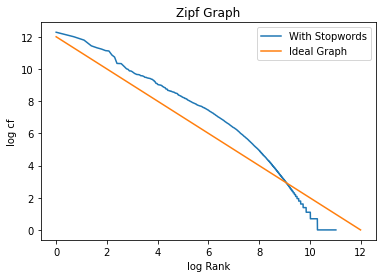

In [26]:
# Step4) plot
plt.title('Zipf Graph')
plt.xlabel('log Rank')
plt.ylabel('log cf')
plt.plot(log_rank, log_cf, label='With Stopwords')
plt.plot(range(math.ceil(max(log_cf))), range(math.ceil(max(log_cf)))[::-1], label='Ideal Graph')
plt.legend()

- [ ] **Removing Stopwords:**

In [27]:
# Step1) find preprocessed contents without considering stopwords
# (We do it before.in Default mode, the total_preprocess function remove stopwords)

# Step2) find cf for tokens
# here we can calculate summation of tf for a token or use last method
cf2 = get_cf(preprocessed_content)

In [28]:
# Step3) define horizontal axis or log_rank variable and vertical axis or log_cf varibale
log_rank2 = list(map(math.log, range(1, len(cf2)+1)))
log_cf2 = [math.log(single_cf) for single_cf in cf2]

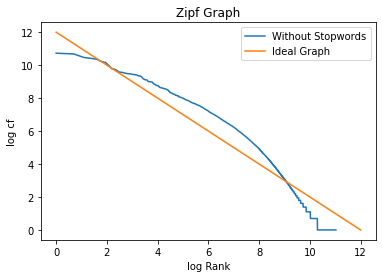

In [29]:
# Step4) plot
plt.title('Zipf Graph')
plt.xlabel('log Rank')
plt.ylabel('log cf')
plt.plot(log_rank2, log_cf2, label='Without Stopwords')
plt.plot(range(math.ceil(max(log_cf))), range(math.ceil(max(log_cf)))[::-1], label='Ideal Graph')
plt.legend()

**Q3:** Check the correctness of heaps law in two cases before and after stemming. To check this law, it is necessary to estimate the size of the dictionary for all documents using the size of the dictionary and the number of tokens in the first 500, 1000, 1500 and 2000 documents. Finally, the actual size of the dictionary and the estimated size in both cases should be compared and analyzed.

**Answer:**  
- We have below formula for this law:
$$\log M = \log K + b\log T$$

with the help of below function we can find T and M in above formula according to our data

In [30]:
def get_T_M(preprocessed_contents):
    # we define the dictionary as a set. because we send tokens inside it and 
    # just we want number of different terms( We know terms in dictionary are keys and also they are unique)
    dictionary = set()
    actual_dictionary_size = []
    
    visited_docs_num = 0
    
    info_for_estimation = {}
    
    for content in preprocessed_contents:
        for token in content:
            dictionary.add(token)
            actual_dictionary_size.append(len(dictionary))
        visited_docs_num += 1
        
        if visited_docs_num in [500,1000,1500,2000]:
            info_for_estimation[visited_docs_num] ={'M':len(dictionary), 'T':len(actual_dictionary_size)}
    return actual_dictionary_size, info_for_estimation

for prediction we use simple linear reqression model. first we should train it and then use it for predictions

In [31]:
def get_model(T_list, M_list):
    model = LinearRegression()
    x = np.array(T_list).reshape(-1, 1)
    y = np.array(M_list)
    model.fit(x, y)
    return model

In [32]:
def get_parameters(actual_dictionary_size, info_for_estimation):
    T_list_for_prediction = []
    M_list_for_prediction = []
    for doc_nums in info_for_estimation:
        M_list_for_prediction.append(math.log(info_for_estimation[doc_nums]['M']))
        T_list_for_prediction.append(math.log(info_for_estimation[doc_nums]['T']))

    model = get_model(T_list_for_prediction, M_list_for_prediction)
    T = [math.log(i) for i in range(1, len(actual_dictionary_size)+1)]
    M_actual = [math.log(i) for i in actual_dictionary_size]
    T_predicted = [0] + T_list_for_prediction + [math.log(len(actual_dictionary_size))]
    M_predicted = model.predict(np.array(T_predicted).reshape(-1,1)).tolist()
    
    return T_list_for_prediction, M_list_for_prediction, T, M_actual, M_predicted, T_predicted

- [ ] **Without Stemming:**

In [33]:
# Step1) find preprocess contents and also stemming isnt done
preprocessed_without_stemming = []
for i in range(len(df)):
    if ( i % 2000 ==0):
        print(i)
    input_content_heaps_without_stemming = df.iloc[i]['content']
    new_content = total_preprocess (input_content_heaps_without_stemming, is_stemming=False)
    preprocessed_without_stemming.append(new_content)

0
2000
4000
6000
8000
10000
12000


In [34]:
# Step2) get T and M for each of tokens
actual_dictionary_size, info_for_estimation = get_T_M(preprocessed_without_stemming)
# Step3) find the data of variables that we want to plot
T_list_for_prediction, M_list_for_prediction, T, M_actual, M_predicted, T_predicted = get_parameters(actual_dictionary_size, info_for_estimation)

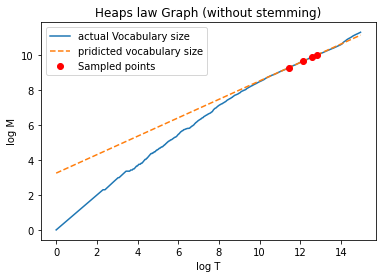

In [35]:
plt.title('Heaps law Graph (without stemming)')
plt.xlabel('log T')
plt.ylabel('log M')
plt.plot(T, M_actual, label='actual Vocabulary size')
plt.plot(T_predicted, M_predicted, linestyle='--', label='pridicted vocabulary size')
plt.plot(T_list_for_prediction, M_list_for_prediction, 'ro', label='Sampled points')
plt.legend()

- [ ] **With Stemming:**

In [36]:
# Step2) get T and M for each of tokens
actual_dictionary_size, info_for_estimation = get_T_M(preprocessed_content)
# Step3) find the data of variables that we want to plot
T_list_for_prediction, M_list_for_prediction, T, M_actual, M_predicted, T_predicted = get_parameters(actual_dictionary_size, info_for_estimation)

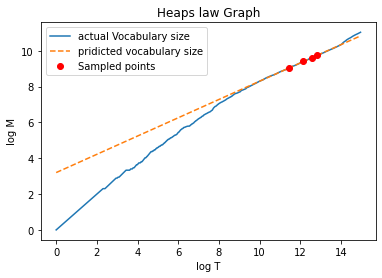

In [37]:
plt.title('Heaps law Graph')
plt.xlabel('log T')
plt.ylabel('log M')
plt.plot(T, M_actual, label='actual Vocabulary size')
plt.plot(T_predicted, M_predicted, linestyle='--', label='pridicted vocabulary size')
plt.plot(T_list_for_prediction, M_list_for_prediction, 'ro', label='Sampled points')
plt.legend()

**Q4:** Mention at least three cases where you faced challenges in Stemming. (For example, words that do not need stemming, but are lost according to the process of stemming.)

**Answer:** 
- Some of roots are not correct. forexample the root of "هسته" isn't "هست"
- In some situations we see some meaningless words or with %u sign and somthing like these
- For some words a list of roots is returned.
- Some plural words specificly words with "ات" are stemmed incorrectly.

**Q5:** Answer the question in the following modes:

- [ ] A query of simple and frequently used words (such as 'تحریم‌های آمریکا علیه ایران', in the retrieved results it is expected that documents that contain the words sanctions, آمریکا, علیه and ایران are at the top of the list and documents that do not have some words at the lower ranks of the list are supposed to be)

In [38]:
Query('تحریم‌های آمریکا علیه ایران')

/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\
Rank: 169
docID: 9742
Title: مرکز پژوهش‌های مجلس: مذاکرات وین به توافقی زودهنگام منجر نمی‌شود
URL: https://www.farsnews.ir/news/14000924000773/مرکز-پژوهش‌های-مجلس-مذاکرات-وین-به-توافقی-زودهنگام-منجر-نمی‌شود

به گزارش خبرگزاری فارس، مرکز پژوهش‌های مجلس شورای اسلامی در گزارشی با عنوان «مذاکرات وین: تقابل اراده‌ها و جنگ روایت‌ها» به موضوع مذاکرات اخیر ایران با 1+4 پرداخت.  در بخش چکیده این گزارش آمده است: انگیزه اصلی جمهوری اسلامی ایران برای ورود به مذاکرات وین، تحقق هدف مندرج در بند «29» برجام یعنی «عادی‌سازی روابط اقتصادی و تجاری» بود. با این‌حال، نتایج 6 دور اول گفتگوهای وین به‌دلیل عدم اراده آمریکا برای لغو مؤثر همه تحریم‌ها و ارائه تضمین به‌لحاظ اقتصادی، منافع ملی جمهوری اسلامی ایران را تأمین نمی‌کرد.  به‌دلیل عدم انتفاع اقتصادی، تجدیدنظر درباره پیش‌نویس 6 دور قبلی مذاکرات یک ضرورت برای جمهوری اسلامی ایران محسوب می‌شد، ولی آمریکا ـ حتی پیش از تدوین متن جدید در تهران ـ با ایجاد کمپین ر

- [ ] A query with the NOT operator (such as 'تحریم‌های آمریکا ! ایران', it is expected that documents containing the two words تحریم and امریکا, but not the word ایران, will be present in the retrieved results.)

In [39]:
Query('تحریم‌های آمریکا ! ایران')

/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\
Rank: 14
docID: 7615
Title: یک مأموریت‌ فتنه 88 کاهش قدرت چانه‌زنی مسؤولان در مذاکرات بود
URL: https://www.farsnews.ir/news/14001129000373/یک-مأموریت‌-فتنه-کاهش-قدرت-چانه‌زنی-مسؤولان-در-مذاکرات-بود

حجت‌الاسلام مجتبی ذوالنور نماینده مردم قم در مجلس، در گفت‌وگو با خبرنگار پارلمانی خبرگزاری فارس، با اشاره به مسأله تحریم‌های ضدایرانی در حوزه‌های مختلف و ریشه‌های اصلی وقوع پدیده تحریم اظهار داشت: فلسفه وضع تحریم‌ها، افزایش فشار بر مردم و نظام بوده است تا تاب‌آوری مردم از بین برود و مقاومت آنها بشکند و در نهایت تسلیم شوند. وی افزود: دشمن با این هدف تحریم‌ها را ادامه داده و هر چیزی که دشمنان ما احساس کنند که می‌تواند در مستأصل کردن مسؤولان و نیز در تنگنا قرار دادن مردم مؤثر واقع شود، از آن استفاده می‌کنند تا در نهایت، مردم تسلیم شوند. عضو کمیسیون امنیت ملی و سیاست خارجی مجلس تصریح کرد: مذاکرات هسته‌ای از زمان دولت خاتمی و زمانی که آقای روحانی دبیر شورای عالی امنیت ملی بوده تا بعدها که آقایان 

- [ ] A query with a phrase operator (such as "کنگره ضدتروریست", it is expected that there will be documents containing the phrase کنگره ضدتروریست in the retrieved results; in other words, the location of the words is important in this case.)

In [40]:
Query('"کنگره ضدتروریست"')

/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\
Rank: 1
docID: 6929
Title: توضیحات یک منبع آگاه درباره وقفه مذاکرات وین
URL: https://www.farsnews.ir/news/14001222000450/توضیحات-یک-منبع-آگاه-درباره-وقفه-مذاکرات-وین

به گزارش خبرنگار سیاسی خبرگزاری فارس، به نظر می‌رسد مذاکرات وین به روزهای آخر خود نزدیک شده است و براساس اعلام برخی منابع تا رسیدن به توافق راه زیادی باقی نمانده و تنها نیاز است آمریکا به آنچه در برجام برای برداشتن تحریم‌ها وعده داده  عمل کند و تضمین معتبری هم برای انجام این تعهدات داده شود. براساس اعلام مسئولان سیاست خارجه در کنار دریافت تضمین‌ معتبر، برداشتن همه تحریم‌ها از نکات و مطالبات اصلی ایران در مذاکرات است. اما به نظر می‌رسد آمریکا در مقابل عمل به این تعهد برجامی مقاومت می‌کند. * تحریم‌های آمریکا علیه ایران آمریکا پس از تسخیر لانه‌ جاسوسی آمریکا در تهران، «کارتر» در تاریخ 8 نوامبر 1979م. با استناد به قانون‌ «کنترل صدور تسلیحات نظامی»، کشتی حامل‌ لوازم یدکی نظامی متعلق به ایران را توقیف کرد. ارزش این لوازم 300 میل

- [ ] A complex query (like 'تحریم هسته‌ای" آمریکا ! ایران"', it is expected that there will be documents that include the word تحریم هسته‌ای and the word آمریکا but not the word ایران in the retrieved results.)

In [41]:
Query('"تحریم هسته‌ای" آمریکا گزارش ! ایران')

There isn't any doc related to this query


- [ ] A query of rare words (such as 'اورشلیم ! صهیونیست', the expected output of this part is similar to part B, with the difference that the words used in the query are rare words.)

In [42]:
Query('اورشلیم ! صهیونیست')

There isn't any doc related to this query
